In [2]:
from dbm import error



import requests
import pandas as pd
from numpy.f2py.cb_rules import cb_map
from numpy.ma.extras import average

api_key = "6d284fd3b3c34c6c84955138251910"
date = "2025-10-19"
time = "20:00"  # 8 PM
cities = [
    "Bengaluru, Karnataka",
    "Mumbai, Maharashtra",
    "Chennai, Tamil Nadu",
    "Kolkata, West Bengal",
    "Delhi, Delhi",
    "Hyderabad, Telangana",
    "Jaipur, Rajasthan"
]

weather_list = []

for city in cities:
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={api_key}&q={city}&date={date}&enddate={date}&format=json&tp=1"
    response = requests.get(url)
    data = response.json()

    try:
        # Find hourly data closest to 20:00
        hour_data = None
        for hour in data['data']['weather'][0]['hourly']:
            if hour['time'] == "2000":  # API returns time in 24hr format without ':'
                hour_data = hour
                break

        if hour_data:
            weather_list.append({
                'city': city,
                'date': date,
                'time': "20:00",
                'tempC': hour_data['tempC'],
                'precipMM': hour_data['precipMM'],
                'windspeedKmph': hour_data['windspeedKmph'],
                'weatherDesc': hour_data['weatherDesc'][0]['value'],
                'humidity': hour_data['humidity'],
                'cloudcover': hour_data['cloudcover']
            })
        else:
            print(f"No data at 20:00 for {city}")

    except KeyError:
        print(f"Weather data not found for {city}")

df_weather = pd.DataFrame(weather_list)
df_weather.to_csv("india_weather_19oct2025.csv", index=False)
print("Weather data for multiple cities saved!")


Weather data for multiple cities saved!


In [3]:
print(df_weather)
print("Null Values:",pd.isnull(df_weather).sum())
df_weather.columns
df_weather.sort_values(by=['tempC'], ascending=False, inplace=True)

df_weather.to_csv('Book2.csv', index=False)
print("Weather data for multiple cities saved!")

                   city        date   time tempC precipMM windspeedKmph  \
0  Bengaluru, Karnataka  2025-10-19  20:00    22      1.7            13   
1   Mumbai, Maharashtra  2025-10-19  20:00    29      0.0             8   
2   Chennai, Tamil Nadu  2025-10-19  20:00    26      0.0            12   
3  Kolkata, West Bengal  2025-10-19  20:00    28      0.0             1   
4          Delhi, Delhi  2025-10-19  20:00    30      0.0             7   
5  Hyderabad, Telangana  2025-10-19  20:00    23      0.0            12   
6     Jaipur, Rajasthan  2025-10-19  20:00    26      0.0             6   

         weatherDesc humidity cloudcover  
0  Light rain shower       92         75  
1              Clear       67         14  
2             Cloudy       84         72  
3      Partly cloudy       65         33  
4              Clear       30          5  
5              Clear       77         11  
6              Clear       37          3  
Null Values: city             0
date             0
time

In [4]:
df_weather.describe()


,city,date,time,tempC,precipMM,windspeedKmph,weatherDesc,humidity,cloudcover
count,7,7,7,7,7,7,7,7,7
unique,7,1,1,6,2,6,4,7,7
top,"Delhi, Delhi",2025-10-19,20:00,26,0.0,12,Clear,30,5
freq,1,7,7,2,6,2,4,1,1


In [5]:
df_weather['date']=pd.to_datetime(df_weather['date'])
print(df_weather['date'])

4   2025-10-19
1   2025-10-19
3   2025-10-19
2   2025-10-19
6   2025-10-19
5   2025-10-19
0   2025-10-19
Name: date, dtype: datetime64[ns]


In [13]:
df_aqi=pd.read_csv('Book2.csv')
print(df_aqi.head())

  country  state   city                    station       last_update  \
0   India  Delhi  Delhi  Anand Vihar, Delhi - DPCC  19-10-2025 20:00   
1   India  Delhi  Delhi  Ashok Vihar, Delhi - DPCC  19-10-2025 20:00   
2   India  Delhi  Delhi     Aya Nagar, Delhi - IMD  19-10-2025 20:00   
3   India  Delhi  Delhi     Aya Nagar, Delhi - IMD  19-10-2025 20:00   
4   India  Delhi  Delhi       Bawana, Delhi - DPCC  19-10-2025 20:00   

    latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
0  28.647622  77.315809        OZONE            9.0           30.0   
1  28.695381  77.181665         PM10          171.0          318.0   
2  28.470691  77.109936         PM10          141.0          290.0   
3  28.470691  77.109936          NO2           61.0          140.0   
4  28.776200  77.051074        PM2.5          270.0          381.0   

   pollutant_avg  
0           18.0  
1          267.0  
2          213.0  
3           88.0  
4          329.0  


In [15]:
import pandas as pd

df_AQI_by_Weather = pd.concat([df_weather.reset_index(drop=True),
                       df_aqi.reset_index(drop=True)])

print(df_AQI_by_Weather.head())



                   city       date   time tempC precipMM windspeedKmph  \
0          Delhi, Delhi 2025-10-19  20:00    30      0.0             7   
1   Mumbai, Maharashtra 2025-10-19  20:00    29      0.0             8   
2  Kolkata, West Bengal 2025-10-19  20:00    28      0.0             1   
3   Chennai, Tamil Nadu 2025-10-19  20:00    26      0.0            12   
4     Jaipur, Rajasthan 2025-10-19  20:00    26      0.0             6   

     weatherDesc humidity cloudcover country state station last_update  \
0          Clear       30          5     NaN   NaN     NaN         NaN   
1          Clear       67         14     NaN   NaN     NaN         NaN   
2  Partly cloudy       65         33     NaN   NaN     NaN         NaN   
3         Cloudy       84         72     NaN   NaN     NaN         NaN   
4          Clear       37          3     NaN   NaN     NaN         NaN   

   latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
0       NaN        NaN          NaN      

In [16]:
import pandas as pd

df_aqi.columns
print(list(df_aqi.columns))

import pandas as pd
df_num= pd.to_numeric(df_AQI_by_Weather['pollutant_avg'], errors='coerce')



['country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg']


In [17]:
df_aqi.sort_values('city', ascending=False, inplace=True)
print(df_aqi.head())
df_aqi.groupby('city')['pollutant_max'].describe()


    country        state     city                        station  \
492   India  West_Bengal  Kolkata      Victoria, Kolkata - WBPCB   
190   India  West_Bengal  Kolkata    Ballygunge, Kolkata - WBPCB   
379   India  West_Bengal  Kolkata    Ballygunge, Kolkata - WBPCB   
380   India  West_Bengal  Kolkata  Fort William, Kolkata - WBPCB   
381   India  West_Bengal  Kolkata      Jadavpur, Kolkata - WBPCB   

          last_update   latitude  longitude pollutant_id  pollutant_min  \
492  19-10-2025 20:00  22.544808  88.340369          NH3            4.0   
190  19-10-2025 20:00  22.536751  88.363802         PM10           60.0   
379  19-10-2025 20:00  22.536751  88.363802        PM2.5           53.0   
380  19-10-2025 20:00  22.556640  88.342674        OZONE           28.0   
381  19-10-2025 20:00  22.499290  88.369170          NO2            1.0   

     pollutant_max  pollutant_avg  
492            5.0            4.0  
190          106.0           79.0  
379           92.0           69.

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Chennai,48.0,86.812500,125.450619,2.0,8.50,19.0,106.25,500.0
Delhi,252.0,178.301587,150.084453,1.0,43.75,122.0,312.25,500.0
Hyderabad,90.0,57.422222,63.498204,4.0,17.00,32.5,69.25,311.0
Jaipur,37.0,126.918919,105.349518,6.0,45.00,111.0,168.00,399.0
Kolkata,40.0,55.825000,53.147057,5.0,12.75,36.5,84.50,238.0


In [18]:

pd.crosstab(df_aqi['state'], df_aqi['pollutant_id'])


pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
state,,,,,,,
Delhi,37,31,39,38,39,39,32
Rajasthan,6,6,6,6,6,6,6
TamilNadu,6,8,8,6,8,8,8
Telangana,14,12,14,14,13,14,14
West_Bengal,7,7,7,7,7,7,7


In [19]:
pd.crosstab(df_AQI_by_Weather['tempC'], df_AQI_by_Weather['pollutant_id'])

pollutant_id
tempC


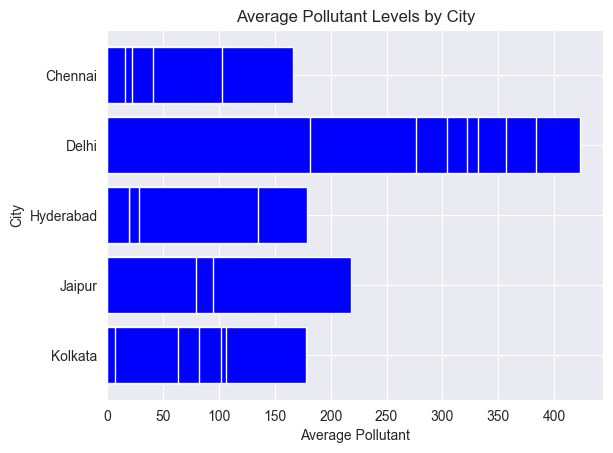

In [20]:
import matplotlib.pyplot as plt

plt.barh(df_aqi['city'], df_aqi['pollutant_avg'], color='blue')  # y, width
plt.xlabel('Average Pollutant')
plt.ylabel('City')
plt.title('Average Pollutant Levels by City')
plt.show()


Text(0.5, 1.0, 'Average Pollutant Levels by City')

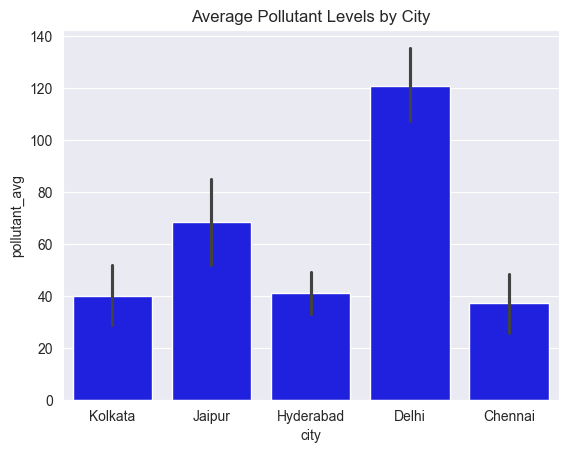

In [21]:
import seaborn as sns
sns.barplot(x='city', y='pollutant_avg', data=df_aqi,color='blue')
plt.title('Average Pollutant Levels by City')


Text(0.5, 1.0, 'Pollutants by Humidity')

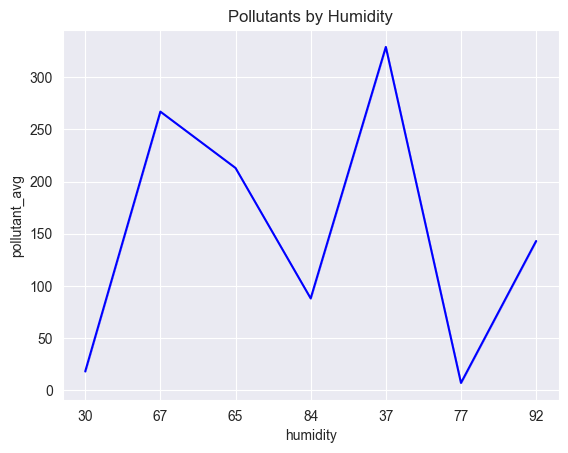

In [22]:
sns.lineplot(x='humidity', y='pollutant_avg', data=df_AQI_by_Weather,color='blue')
plt.title('Pollutants by Humidity')

C:\Users\DELL\AppData\Local\Temp\ipykernel_25160\2506992762.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
C:\Users\DELL\AppData\Local\Temp\ipykernel_25160\2506992762.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
C:\Users\DELL\AppData\Local\Temp\ipykernel_25160\2506992762.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
C:\Users\DELL\AppData\Local\Temp\ipykernel_25160\2506992762.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='pollutant_avg', da

Text(0.5, 1.0, 'Average Pollutant Levels by City')

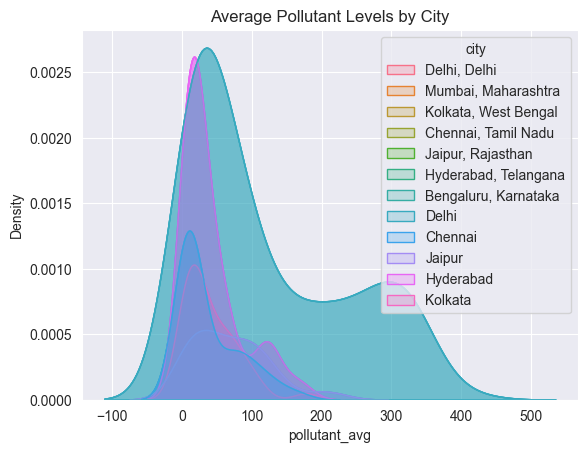

In [27]:
sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
sns.kdeplot(x='pollutant_avg', data=df_AQI_by_Weather, fill=True,hue='city')
plt.title('Average Pollutant Levels by City')



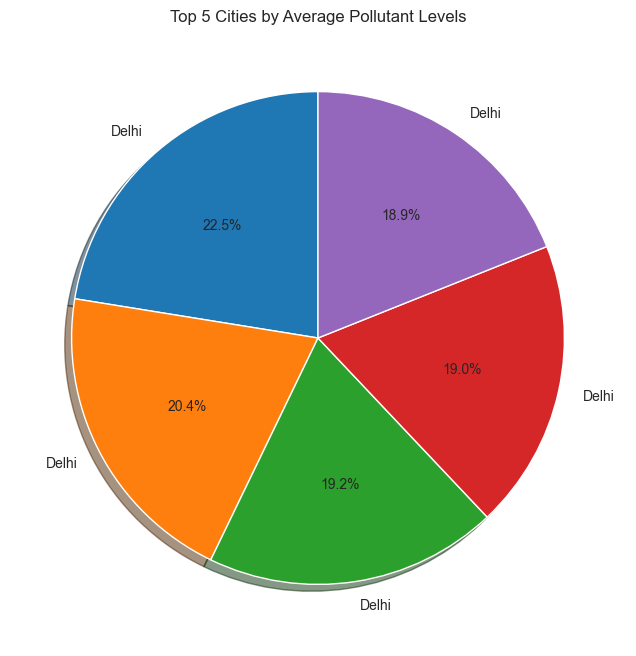

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric values
df_aqi['pollutant_avg'] = pd.to_numeric(df_aqi['pollutant_avg'], errors='coerce')

# Drop rows with NaN
df_aqi_clean = df_aqi.dropna(subset=['pollutant_avg'])

# Sort by pollutant_avg in descending order and take top 5
top5 = df_aqi_clean.sort_values(by='pollutant_avg', ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5['pollutant_avg'],
    labels=top5['city'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
)
plt.title("Top 5 Cities by Average Pollutant Levels")
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_21164\3232470277.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='cloudcover', data=df_AQI_by_Weather,hue='pollutant_id',color='blue')


Text(0.5, 1.0, 'Cloud Cover per City')

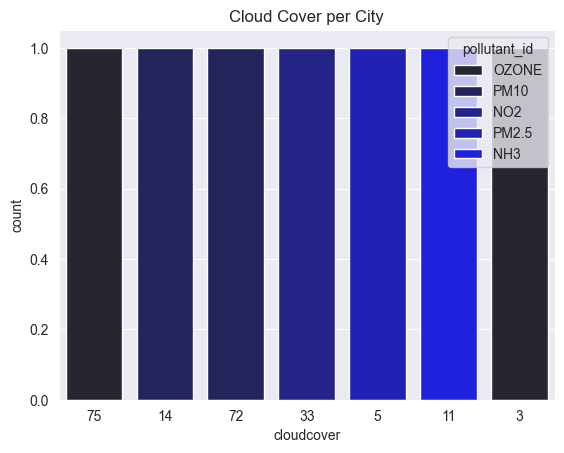

In [39]:
sns.countplot(x='cloudcover', data=df_AQI_by_Weather,hue='pollutant_id',color='blue')
plt.title('Cloud Cover per City')

<Axes: xlabel='state', ylabel='pollutant_max'>

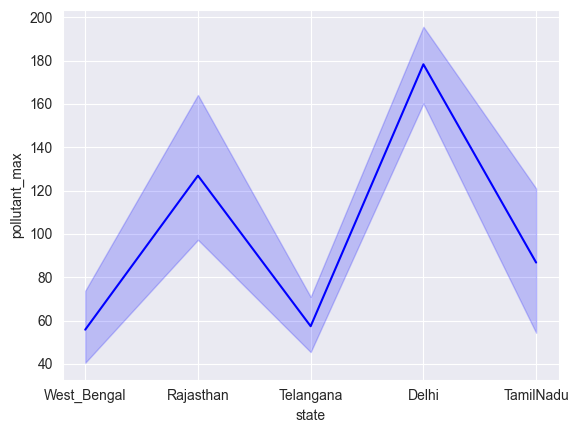

In [50]:
sns.lineplot(x='state', y='pollutant_max', data=df_aqi,color='blue')

<Axes: xlabel='city', ylabel='pollutant_max'>

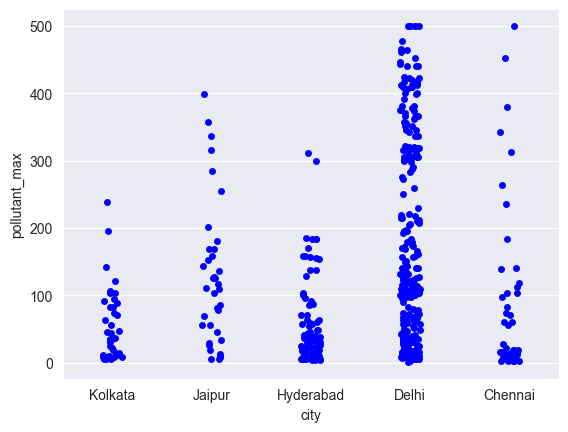

In [84]:
sns.stripplot(x='city', y='pollutant_max', data=df_aqi,color='blue')

<Axes: xlabel='pollutant_id', ylabel='Count'>

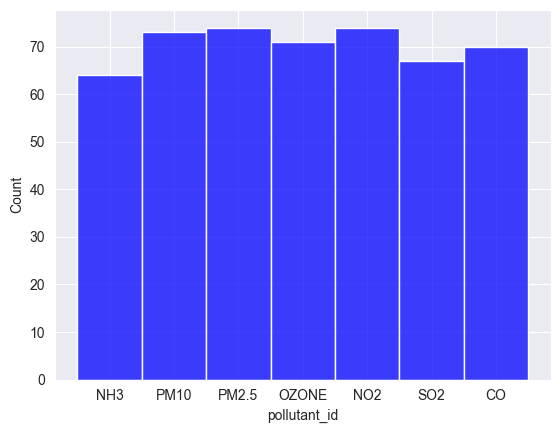

In [85]:
sns.histplot(x='pollutant_id', data=df_aqi,color='blue')

<Axes: xlabel='pollutant_id', ylabel='count'>

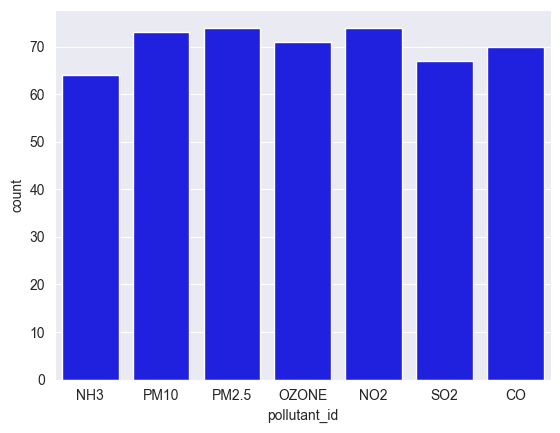

In [86]:
sns.countplot(x='pollutant_id', data=df_aqi,color='blue')

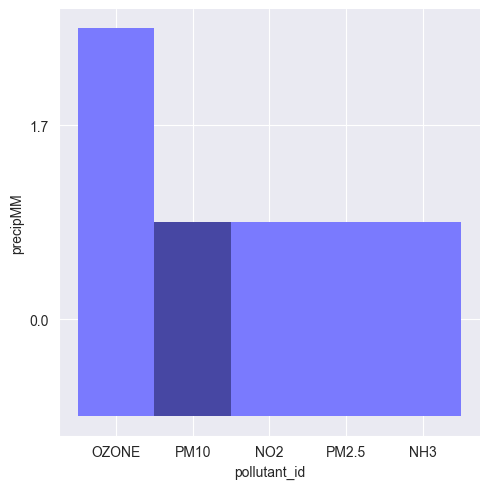

In [87]:
sns.displot(df_AQI_by_Weather, x='pollutant_id',y='precipMM' ,color='blue')

<Axes: xlabel='tempC', ylabel='pollutant_avg'>

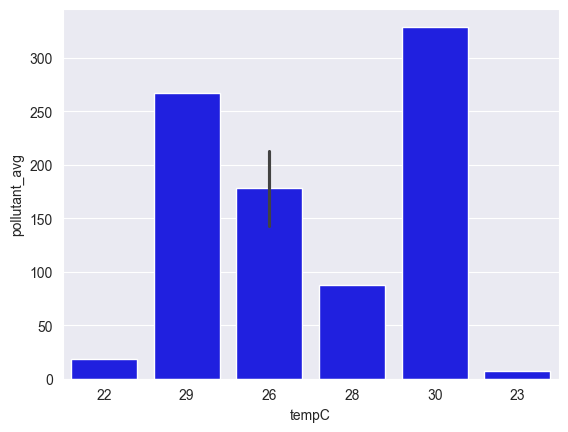

In [29]:
sns.barplot(x='tempC',y='pollutant_avg', data=df_AQI_by_Weather,color='blue')

In [2]:
df_weather.to_sql

NameError: name 'df_weather' is not defined